## 模拟重力抛物线撞击

In [1]:
import numpy as np
import pandas as pd
import os, sys, json
import math

g = 9.8
PI = 3.14159
theta = np.matrix(1/180 * PI * np.arange(0,90,1))
v0 = 10
dist_wall = np.matrix([1.8, 4.5, 7.24])
t = np.matrix(np.arange(0,0.3,0.001))

In [2]:
vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta)
x = np.matmul(vx.T, t)
y = np.matmul(vy.T, t) - 1/2*g*t**2
plt.plot(x, y)
plt.axis("scaled")

LinAlgError: Last 2 dimensions of the array must be square

In [4]:
np.shape(vx)

(1, 90)

In [5]:
np.shape(t)

(1, 300)

## 显示篮球撞到墙面篮板动画

### 动画
![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess")

In [17]:
import arcgis

In [18]:
arcgis.find_centroids?

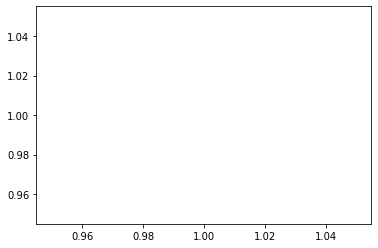

In [15]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
ims = []
fig = plt.figure()
for i in range(1,10):
    im = plt.scatter(1,1).findobj()
    ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
display(HTML(ani.to_html5_video()))
#ani.save("test1.gif", writer='pillow')

In [16]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML
import numpy as np

def plot_sequence_images(image_array):
    ''' Display images sequence as an animation in jupyter notebook
    
    Args:
        image_array(numpy.ndarray): image_array.shape equal to (num_images, height, width, num_channels)
    '''
    dpi = 72.0
    xpixels, ypixels = image_array[0].shape[:2]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array), interval=33, repeat_delay=1, repeat=True)
    display(HTML(anim.to_html5_video()))
    
# Demo of plot_sequence_images
import cv2
video_path = "tkq.mov"
video = cv2.VideoCapture()
video.open(video_path)
imgs = []
while True:
    is_valid, img = video.read()
    if not is_valid: break
    imgs.append(img)
video.release()
#plot_sequence_images(imgs)

In [8]:

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML
import numpy as np

def plot_animation_function(xy_generator, frames=100, figsize=(6, 4), 
                            xlim=(0,2), ylim=(0, 2),interval=20, blit=True):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    line, = ax.plot([], [], lw=2)
    def init():
        line.set_data([], [])
        return (line,)
    def animate(*args, **kwargs):
        x, y = next(xy_generator)
        line.set_data(x, y)
        return (line,)
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames,
                                  interval=interval, blit=blit)
    display(HTML(anim.to_html5_video()))
    fig.delaxes(ax)

# Demo of plot_animation_function
frames = 100
def GeneratorXY(frames):
    for i in range(frames):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        yield (x, y)
        
plot_animation_function(GeneratorXY(frames), frames=frames, figsize=(8, 6),
                       xlim=(0, 2), ylim=(-2, 2))

<Figure size 576x432 with 0 Axes>

#### 存在问题

In [11]:
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64

current_time = 0

# 图像处理函数
def processImg(img):
    # 画出一个框
    cv2.rectangle(img, (500, 300), (800, 400), (0, 0, 255), 5, 1, 0)
    # 上下翻转
    # img= cv2.flip(img, 0)

    # 显示FPS
    global current_time
    if current_time == 0:
        current_time = time.time()
    else:
        last_time = current_time
        current_time = time.time()
        fps = 1. / (current_time - last_time)
        text = "FPS: %d" % int(fps)
        cv2.putText(img, text , (0,100), cv2.FONT_HERSHEY_TRIPLEX, 3.65, (255, 0, 0), 2)

    return img

def arrayShow(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))


video = cv2.VideoCapture("/home/mvg/zmc/playgroud/远大前程27.mp4")

while(True):
    try:
        clear_output(wait=True)
        ret, frame = video.read()
        if not ret:
            break
        lines, columns, _ = frame.shape
        frame = processImg(frame)
        frame = cv2.resize(frame, (int(columns / 4), int(lines / 4)))

        img = arrayShow(frame)
        display(img)
        # 控制帧率
        time.sleep(0.02)
    except KeyboardInterrupt:
        video.release()